# MLP neural network ( Fashion mnist )

Aria Hassanali Aragh . 99222032

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.layers import Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.utils import plot_model
import numpy as np
import pandas as pd

Loading Datasets

In [2]:
fashion_mnist_test  = pd.read_csv("./datasets/fashion-mnist_test.csv")
fashion_mnist_train = pd.read_csv("./datasets/fashion-mnist_train.csv")

# Dataset overview

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

In [3]:
print("trainig dataset : " +str(fashion_mnist_train.shape))
print("testing dataset : " +str(fashion_mnist_test.shape))

trainig dataset : (60000, 785)
testing dataset : (10000, 785)


Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

Each row is a separate image

In [4]:
fashion_mnist_train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

In [5]:
fashion_mnist_train.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

#Labels

Each training and test example is assigned to one of the following labels:

"0" T-shirt/top
"1" Trouser
"2" Pullover "3" Dress
"4" Coat
"5" Sandal
"6" Shirt
"7" Sneaker
"8" Bag
"9" Ankle boot

In [6]:
def label_to_string(argument):
    if argument == 0:
        return "T-shirt/top"
    elif argument == 1:
        return "Trouser"
    elif argument == 2:
         return "Pullover"
    elif argument == 3:
        return " Dress"
    elif argument == 4:
        return "Coat"
    elif argument == 5:
        return "Sandal"
    elif argument == 6:
        return "Shirt"
    elif argument == 7:
        return "Sneaker"
    elif argument == 8:
        return "Bag"
    elif argument == 9:
        return "Ankle boot"
    


In [7]:
fashion_mnist_train.loc[1, fashion_mnist_train.columns != "label"]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 1, Length: 784, dtype: int64

# Checking function

In [4]:
trainingAsMatrix = np.asmatrix(fashion_mnist_train)

In [73]:
def Check(a):
    label = fashion_mnist_train.loc[a][0]
    label = label_to_string(label) 
    image = trainingAsMatrix[a,1:].reshape(28,28)
    print("image number " + str(a) )
    print("label : " + str(label))
    plt.imshow(image)
    plt.show
    

image number 80
label : T-shirt/top


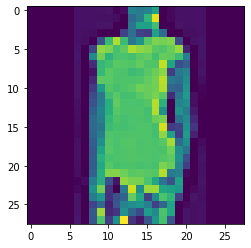

In [10]:
Check(80)

In [6]:
X = trainingAsMatrix[:,1:]

In [8]:
X.shape

(60000, 784)

# Plotting

In [74]:
Y = trainingAsMatrix[:,0]

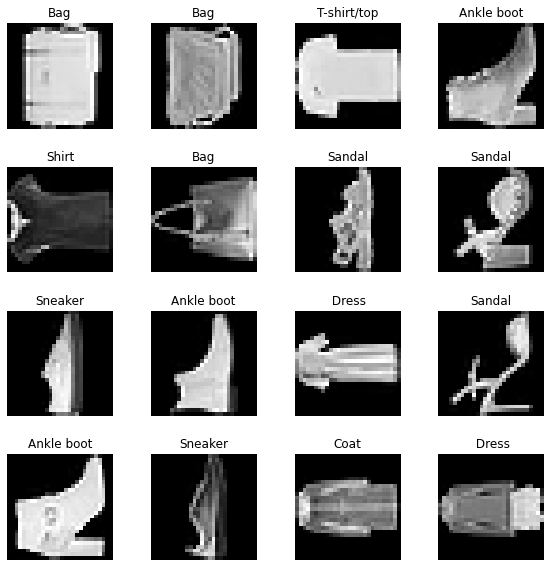

In [75]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
X = trainingAsMatrix[:,1:]
m, n = X.shape
fig, axes = plt.subplots(4,4, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((28,28)).T
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(label_to_string(fashion_mnist_train.loc[random_index][0]))
    ax.set_axis_off()

# Modeling

First we implement simple model using Tensorflow 

In [76]:
model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),   
        Dense(units=56,activation=tf.nn.relu ,name="layer1"),
        Dense(units=128,activation=tf.nn.relu ,name="layer2"),
        Dense(units=10 ,activation=tf.nn.softmax ,name="layer3")
    
    ], name = "simpleTensorflowModel" 
) 

In [17]:
model.compile(
    loss= "sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

model.fit(
    X,Y,
    epochs=20
)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3966 - categorical_accuracy: 0.1132
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8021 - categorical_accuracy: 0.0956
Epoch 3/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7746 - categorical_accuracy: 0.0926
Epoch 4/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7613 - categorical_accuracy: 0.0949
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7186 - categorical_accuracy: 0.0984
Epoch 6/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7064 - categorical_accuracy: 0.1013
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6695 - categorical_accuracy: 0.1045
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6298 - categorical_accuracy: 0.1047
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6142 - cat

# Normalizing

In [77]:
normalizationX = X/255

In [19]:
model.compile(
    loss= "sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

model.fit(
    normalizationX,Y,
    epochs=20
)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5482 - categorical_accuracy: 0.1044
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4073 - categorical_accuracy: 0.1056
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3784 - categorical_accuracy: 0.1054
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3618 - categorical_accuracy: 0.1048
Epoch 5/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3485 - categorical_accuracy: 0.1041
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3391 - categorical_accuracy: 0.1041
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3321 - categorical_accuracy: 0.1037
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3253 - categorical_accuracy: 0.1034
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3188 - cat

# Batch Normalization

Without normalizing

In [78]:
modelBatch = Sequential(
    [               
        tf.keras.Input(shape=(784,)),   
        Dense(units=128,activation=tf.nn.relu ,name="layer1"),
        BatchNormalization(),
        Dense(units=512,activation=tf.nn.relu ,name="layer2"),
        BatchNormalization(),
        Dense(units=10 ,activation=tf.nn.softmax ,name="layer3")
    
    ], name = "simpleTensorflowModel" 
) 

In [21]:
modelBatch.compile(
    loss= "sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

modelBatch.fit(
    X,Y,
    epochs=20
)

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5153 - categorical_accuracy: 0.1023
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4052 - categorical_accuracy: 0.1023
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3632 - categorical_accuracy: 0.1025
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3409 - categorical_accuracy: 0.1024
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3244 - categorical_accuracy: 0.1020
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3088 - categorical_accuracy: 0.1015
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2976 - categorical_accuracy: 0.1030
Epoch 8/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2846 - categorical_accuracy: 0.1015
Epoch 9/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2

Add normalization

In [79]:
modelBatch.compile(
    loss= "sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

modelBatch.fit(
    normalizationX,Y,
    epochs=20
)

Epoch 1/20
 681/1875 [=========>....................] - ETA: 6s - loss: 0.5915 - categorical_accuracy: 0.1069

KeyboardInterrupt: 

# Dropout

In [22]:
# 0.2 

In [16]:
modelDropout_2 = Sequential(
    [               
        tf.keras.Input(shape=(784,)),   
        Dense(units=128,activation=tf.nn.relu ,name="layer1"),
        Dropout(0.2),
        Dense(units=512,activation=tf.nn.relu ,name="layer2"),
        Dropout(0.2),
        Dense(units=10 ,activation=tf.nn.softmax ,name="layer3")
    
    ], name = "simpleTensorflowModel" 
) 

In [24]:
modelDropout_2.compile(
    loss= "sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

modelDropout_2.fit(
    normalizationX,Y,
    epochs=20
)

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5366 - categorical_accuracy: 0.1057
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4146 - categorical_accuracy: 0.1042
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3853 - categorical_accuracy: 0.1032
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3643 - categorical_accuracy: 0.1032
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3495 - categorical_accuracy: 0.1027
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3377 - categorical_accuracy: 0.1025
Epoch 7/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3262 - categorical_accuracy: 0.1033
Epoch 8/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3183 - categorical_accuracy: 0.1027
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3131 - cat

In [36]:
#0.3

In [17]:
modelDropout_3 = Sequential(
    [               
        tf.keras.Input(shape=(784,)),   
        Dense(units=128,activation=tf.nn.relu ,name="layer1"),
        Dropout(0.3),
        Dense(units=512,activation=tf.nn.relu ,name="layer2"),
        Dropout(0.3),
        Dense(units=10 ,activation=tf.nn.softmax ,name="layer3")
    
    ], name = "simpleTensorflowModel" 
) 

In [26]:
modelDropout_3.compile(
    loss= "sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

modelDropout_3.fit(
    normalizationX,Y,
    epochs=20
)

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5773 - categorical_accuracy: 0.1067
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4417 - categorical_accuracy: 0.1042
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4119 - categorical_accuracy: 0.1046
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3909 - categorical_accuracy: 0.1043
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3779 - categorical_accuracy: 0.1032
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3669 - categorical_accuracy: 0.1034
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3576 - categorical_accuracy: 0.1028
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3507 - categorical_accuracy: 0.1037
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3483 - cat

In [37]:
#0.4

In [18]:
modelDropout_4 = Sequential(
    [               
        tf.keras.Input(shape=(784,)),   
        Dense(units=128,activation=tf.nn.relu ,name="layer1"),
        Dropout(0.4),
        Dense(units=512,activation=tf.nn.relu ,name="layer2"),
        Dropout(0.4),
        Dense(units=10 ,activation=tf.nn.softmax ,name="layer3")
    
    ], name = "simpleTensorflowModel" 
) 

In [30]:
modelDropout_4.compile(
    loss= "sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

modelDropout_4.fit(
    normalizationX,Y,
    epochs=20
)

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6155 - categorical_accuracy: 0.1075
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4753 - categorical_accuracy: 0.1037
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4448 - categorical_accuracy: 0.1032
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4226 - categorical_accuracy: 0.1045
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4145 - categorical_accuracy: 0.1039
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4009 - categorical_accuracy: 0.1036
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3933 - categorical_accuracy: 0.1044
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3846 - categorical_accuracy: 0.1036
Epoch 9/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3810 - cat

# Early stopping

In [80]:
ES = EarlyStopping(monitor='categorical_accuracy', patience=3)

In [81]:
modelBatch.compile(
    loss= "sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

modelBatch.fit(
    normalizationX,Y,
    epochs=20,callbacks=[ES]
)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4503 - categorical_accuracy: 0.1034
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3819 - categorical_accuracy: 0.1024
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3568 - categorical_accuracy: 0.1030
Epoch 4/20
1579/1875 [========================>.....] - ETA: 1s - loss: 0.3301 - categorical_accuracy: 0.1027

KeyboardInterrupt: 

# L1 and L2

In [20]:
model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),   
        Dense(units=56,activation=tf.nn.relu ,kernel_regularizer='l1',name="layer1"),
        Dense(units=128,activation=tf.nn.relu ,kernel_regularizer='l1',name="layer2"),
        Dense(units=10 ,activation=tf.nn.softmax ,name="layer3")
    
    ], name = "simpleTensorflowModel" 
) 

In [43]:
model.compile(
    loss= "sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

model.fit(
    normalizationX,Y,
    epochs=20,
)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 2.0622 - categorical_accuracy: 0.1107
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1989 - categorical_accuracy: 0.1102
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1273 - categorical_accuracy: 0.1093
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0883 - categorical_accuracy: 0.1081
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0640 - categorical_accuracy: 0.1074
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0455 - categorical_accuracy: 0.1076
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0337 - categorical_accuracy: 0.1064
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0249 - categorical_accuracy: 0.1068
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0119 - cat

# The Final Model

In [91]:
FinalModel = Sequential(
    [               
        tf.keras.Input(shape=(784,)),  
        Dense(units=128,activation=tf.nn.relu ,name="layer0"),
        BatchNormalization(),
        Dense(units=256,activation=tf.nn.relu ,name="layer1"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(units=512,activation=tf.nn.relu ,name="layer2"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(units=10 ,activation=tf.nn.softmax ,name="layer3")
    
    
    ], name = "FinalModel" 
) 

In [92]:
FinalModel.compile(
    loss= "sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)



In [94]:
FinalModel.fit(
    normalizationX,Y,
    epochs=20,
)

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6271 - categorical_accuracy: 0.1024
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4606 - categorical_accuracy: 0.1031
Epoch 3/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4284 - categorical_accuracy: 0.1025
Epoch 4/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4018 - categorical_accuracy: 0.1031
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3861 - categorical_accuracy: 0.1032
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3723 - categorical_accuracy: 0.1039
Epoch 7/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3585 - categorical_accuracy: 0.1032
Epoch 8/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3470 - categorical_accuracy: 0.1020
Epoch 9/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3

In [97]:
testMatrix = np.asmatrix(fashion_mnist_test)
xTest = testMatrix[:,1:]
yTest = testMatrix[:,0]

In [98]:
xTest=xTest/255
yTest=yTest/255

In [100]:
history = FinalModel.fit(normalizationX, Y, epochs=30, batch_size=200, validation_data=(xTest, yTest), callbacks=[ES])

Epoch 1/30
298/300 [============================>.] - ETA: 0s - loss: 0.2222 - categorical_accuracy: 0.1022

InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\ASUS02\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\ASUS02\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\ASUS02\anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\ASUS02\anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\ASUS02\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ASUS02\AppData\Local\Temp/ipykernel_20516/4007401357.py", line 1, in <module>
      FinalModel.evaluate(xTest, yTest)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\engine\training.py", line 1756, in evaluate
      tmp_logs = self.test_function(iterator)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\engine\training.py", line 1557, in test_function
      return step_function(self, iterator)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\engine\training.py", line 1546, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\engine\training.py", line 1535, in run_step
      outputs = model.test_step(data)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\engine\training.py", line 1501, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\backend.py", line 5238, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
labels must be 1-D, but got shape [200,1]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_test_function_384862]

In [99]:
FinalModel.evaluate(xTest, yTest)

InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\ASUS02\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\ASUS02\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\ASUS02\anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\ASUS02\anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\ASUS02\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ASUS02\AppData\Local\Temp/ipykernel_20516/4007401357.py", line 1, in <module>
      FinalModel.evaluate(xTest, yTest)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\engine\training.py", line 1756, in evaluate
      tmp_logs = self.test_function(iterator)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\engine\training.py", line 1557, in test_function
      return step_function(self, iterator)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\engine\training.py", line 1546, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\engine\training.py", line 1535, in run_step
      outputs = model.test_step(data)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\engine\training.py", line 1501, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\ASUS02\anaconda3\lib\site-packages\keras\backend.py", line 5238, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
labels must be 1-D, but got shape [32,1]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_test_function_384862]

In [87]:
FinalModel.predict(X_test)

313/313 [==============================] - 1s 4ms/step


array([[5.5424297e-01, 7.3404670e-05, 1.0673282e-02, ..., 3.1928092e-05,
        5.8403326e-04, 3.9307517e-05],
       [1.1315753e-09, 1.0000000e+00, 5.0364229e-10, ..., 3.3443687e-10,
        2.7206801e-10, 7.4383083e-11],
       [1.2308758e-02, 3.1286944e-04, 7.0267153e-01, ..., 3.3505290e-04,
        1.0749992e-03, 1.2182353e-04],
       ...,
       [1.3365862e-08, 8.9979149e-11, 1.3401441e-09, ..., 7.7222373e-10,
        9.9999988e-01, 7.7830672e-11],
       [2.8001359e-02, 4.7363999e-04, 9.0498086e-03, ..., 2.0502871e-04,
        6.6361213e-01, 1.5982843e-04],
       [1.1719097e-02, 6.1053854e-01, 1.0452826e-01, ..., 5.7518261e-04,
        7.0165377e-03, 6.5083749e-04]], dtype=float32)

# The summary


In [60]:
FinalModel.summary()

Model: "FinalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer0 (Dense)              (None, 128)               100480    
                                                                 
 batch_normalization_10 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 layer1 (Dense)              (None, 256)               33024     
                                                                 
 batch_normalization_11 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 layer2 (Dense)              (None, 512)               1